In [1]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("student_data.csv")

In [23]:
df.head(10)

,StudyHours,Attendance,PastScore,Internal,SleepHours,Passed
0,2,60,40,2,5,0
1,5,80,60,0,6,1
2,8,90,75,2,6,1
3,3,70,50,1,5,0
4,7,85,70,0,7,1
5,1,50,30,0,4,0
6,6,78,68,2,6,1
7,4,65,55,0,5,0
8,9,95,80,2,9,1
9,2,55,35,0,4,1


In [13]:
df.shape

(20, 6)

In [10]:
df.describe()

,StudyHours,Attendance,PastScore,SleepHours
count,20.000000,20.000000,20.00000,20.000000
mean,5.100000,74.150000,59.10000,5.950000
std,2.845125,17.372922,19.41215,1.986136
min,1.000000,40.000000,25.00000,3.000000
25%,2.750000,60.000000,43.75000,4.750000
50%,5.000000,77.000000,62.50000,6.000000
75%,7.250000,88.500000,72.75000,7.000000
max,10.000000,99.000000,90.00000,10.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudyHours  20 non-null     int64 
 1   Attendance  20 non-null     int64 
 2   PastScore   20 non-null     int64 
 3   Internal    20 non-null     object
 4   SleepHours  20 non-null     int64 
 5   Passed      20 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.1+ KB


In [18]:
print(df.isnull().sum())

StudyHours    0
Attendance    0
PastScore     0
Internal      0
SleepHours    0
Passed        0
dtype: int64


# Preproceesing

In [19]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
df['Internal'] = le.fit_transform(df['Internal'])
df['Passed'] = le.fit_transform(df['Passed'])

In [22]:
df.head()

,StudyHours,Attendance,PastScore,Internal,SleepHours,Passed
0,2,60,40,2,5,0
1,5,80,60,0,6,1
2,8,90,75,2,6,1
3,3,70,50,1,5,0
4,7,85,70,0,7,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   StudyHours  20 non-null     int64
 1   Attendance  20 non-null     int64
 2   PastScore   20 non-null     int64
 3   Internal    20 non-null     int64
 4   SleepHours  20 non-null     int64
 5   Passed      20 non-null     int64
dtypes: int64(6)
memory usage: 1.1 KB


# Features scaling

In [27]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
features = ['StudyHours','Attendance','PastScore','SleepHours']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

In [30]:
X = df_scaled[features]
y = df_scaled['Passed']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [32]:
model = LogisticRegression()

In [33]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [34]:
y_pred = model.predict(X_test)

In [35]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



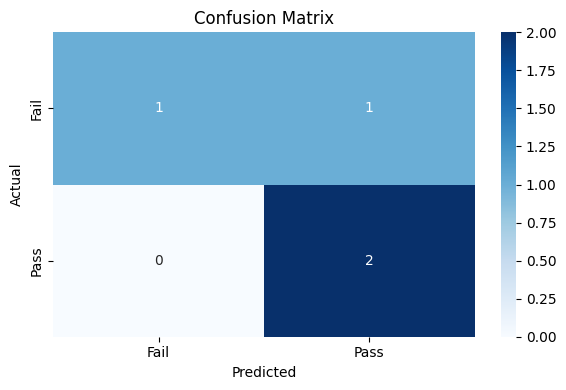

In [40]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Pass'],
            yticklabels=['Fail', 'Pass'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
